# Image Resizing, Scaling & Interpolation

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
image = cv.imread("./images/coral_reef.jpg")

print(image)
print(image.shape)

[[[185 139  51]
  [184 138  50]
  [183 137  49]
  ...
  [174 186 196]
  [173 188 204]
  [166 183 202]]

 [[184 138  50]
  [183 137  49]
  [183 137  49]
  ...
  [181 203 209]
  [123 152 161]
  [156 188 201]]

 [[184 138  50]
  [183 137  49]
  [183 137  49]
  ...
  [143 183 181]
  [136 188 188]
  [179 237 236]]

 ...

 [[ 32  69  89]
  [ 32  72  91]
  [ 29  68  90]
  ...
  [ 61  99 104]
  [ 70  94 100]
  [ 57  76  81]]

 [[ 42  92 114]
  [ 43  93 115]
  [ 39  89 112]
  ...
  [ 67 102 106]
  [ 77  97 102]
  [ 53  68  71]]

 [[ 61 120 146]
  [ 61 120 146]
  [ 54 112 141]
  ...
  [ 25  55  60]
  [ 35  52  55]
  [ 30  39  42]]]
(853, 1280, 3)


In [9]:
# Show only red channel
image = cv.imread("./images/coral_reef.jpg")
b,g,r = cv.split(image)
blank = np.zeros_like(b)

print(blank.shape)

img_red = cv.merge((blank, blank, r))
# print(img_red)
# print(img_red.shape)


cv.imshow("Image Window", img_red) 
cv.waitKey(0)                   
cv.destroyAllWindows()           

(853, 1280)


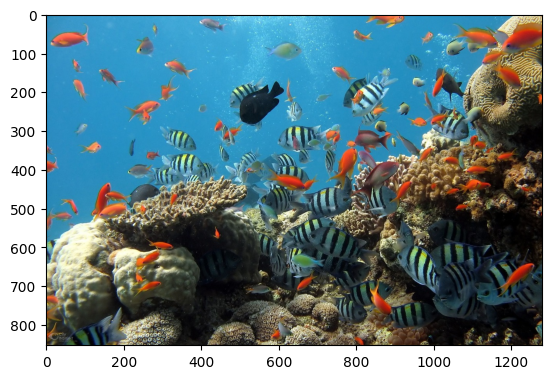

In [19]:
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [17]:
# Image Resizing
print(image_rgb.shape)

(853, 1280, 3)


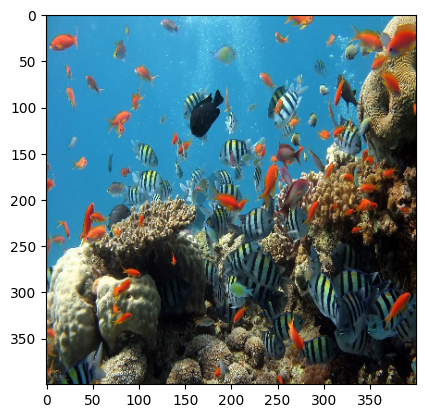

In [18]:
new_height, new_width = 400, 400 

resized_image = cv.resize(image_rgb, (new_width, new_height))

plt.imshow(resized_image)

(426, 640, 3)


Text(0.5, 1.0, 'Scaled Image')

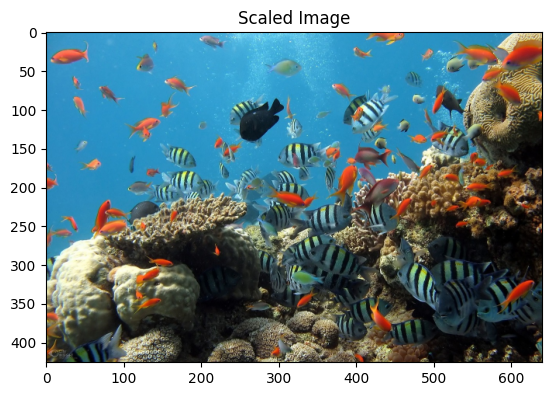

In [21]:
# Image Scaling 
# First I need to process the image
scale_percentage = 50 # reduce by 50 %

s_width  = int(image_rgb.shape[1] * scale_percentage / 100)
s_height = int(image_rgb.shape[0] * scale_percentage / 100)

scaled_image = cv.resize(image_rgb, (s_width, s_height), interpolation=cv.INTER_AREA)
# Inter Area perform similar to Nearest

# see the new shape 
print(scaled_image.shape)

# see the new shape 
plt.imshow(scaled_image)
plt.title("Scaled Image")

# When downsampling you don't loose details !
# the issue on loss is when you upscale, when filling empty pixels with new values it is hard 
# by filing with interpolation you risk to lose details when upscaling

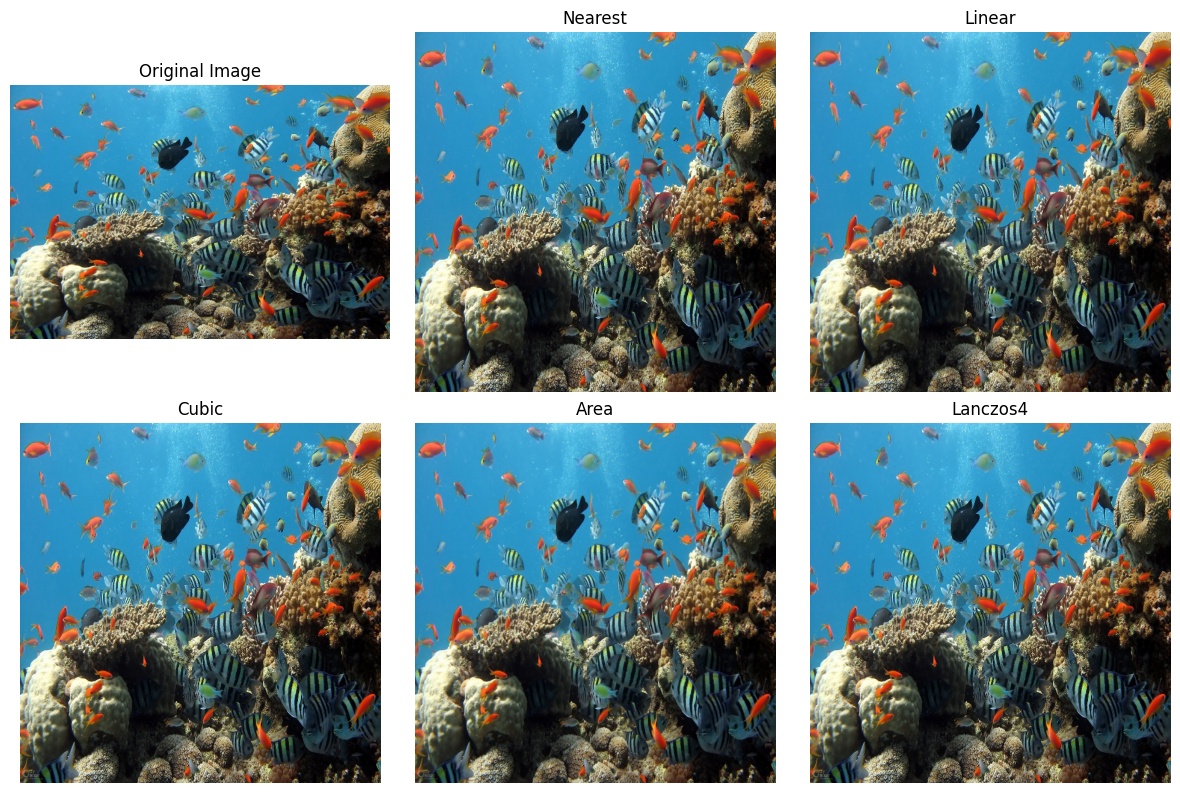

In [ ]:
# Interpolation 

# effect of different interpolation methods 
image = cv.imread("./images/coral_reef.jpg")
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

image_rgb_resized = cv.resize(image_rgb, (100, 100))
# image_rgb_resized = image_rgb

# resizing with different interpolation
resize_width = 600
resize_height = 600

# different interpolation 
methods = {
    'Nearest' : cv.INTER_NEAREST,
    'Linear'  : cv.INTER_LINEAR,
    'Cubic'   : cv.INTER_CUBIC, # better than linear 
    'Area'    : cv.INTER_AREA,
    'Lanczos4': cv.INTER_LANCZOS4 # smoothing effect blurring
}

resized_images = {}

for name,method in methods.items():
    resized_images[name] = cv.resize(image_rgb_resized, (resize_width, resize_height), interpolation=method)
    cv.imwrite(f"./images/interpolation/{name}.jpg", resized_images[name])

# Create a plot
plt.figure(figsize=(12,8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image_rgb_resized)
plt.title("Original Image")
plt.axis('off')

# for i, method in enumerate(methods.keys()):
#     print(i)
#     axs[i].imshow(resized_image[method])
#     axs[i].set_title(method)
#     axs[i].axis('off')
for i, (name, resized_image) in enumerate(resized_images.items(), start = 2):
    plt.subplot(2, 3, i)
    plt.imshow(resized_image)
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()
